# Master Thesis Analysis: Effects of Time Delays on Task Performance


In this notebook, we analyze the effects of **time delays** on several key metrics related to teleoperation tasks. 
This includes:
- Time Scores
- Maze Scores
- NASA-TLX Dimensions (Mental Demand, Physical Demand, Temporal Demand, Performance, Effort, Frustration)
We aim to understand how increasing time delays influence task performance and workload as reported by the participants.


In [53]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'updated_scores_inverted_performance.csv'
data = pd.read_csv(file_path)

# Display first few rows to verify data structure
data.head()


,name,age,gender,profession,gaming experience,Participant Number,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Overall Score,Delays,Time Scores,Maze score
0,1,25,female,student,no,1,10,0,10,70,10,0,16.666667,400,71.46,47.72%
1,1,25,female,student,no,2,10,0,10,70,10,5,17.500000,1400,65.71,45.34%
2,1,25,female,student,no,3,10,0,30,70,10,0,20.000000,800,81.99,58.30%
3,2,21,male,student,yes,4,65,0,10,80,80,80,52.500000,1600,59.38,35.89%
4,2,21,male,student,yes,5,25,0,0,40,65,10,23.333333,160,93.29,51.82%


In [54]:

# Converting percentage-based maze scores to numeric, removing the '%' symbol
data['Maze score'] = data['Maze score'].str.rstrip('%').astype('float')

# Converting columns to numeric where necessary
data['Time Scores'] = pd.to_numeric(data['Time Scores'], errors='coerce')
data['Delays'] = pd.to_numeric(data['Delays'], errors='coerce')

# Ensure all NASA TLX dimensions are numeric as well
nasa_tlx_columns = ['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration']
data[nasa_tlx_columns] = data[nasa_tlx_columns].apply(pd.to_numeric, errors='coerce')

# Display summary statistics to check the data
data.describe()


,name,age,Participant Number,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Overall Score,Delays,Time Scores,Maze score
count,48.000000,48.000000,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,8.500000,25.812500,24.50,40.395833,0.312500,27.083333,33.250000,41.562500,22.979167,27.597222,780.000000,76.193125,55.047708
std,4.658554,3.682369,14.00,23.755617,1.223115,24.273121,20.399729,25.456602,24.326231,13.504129,597.412862,29.745448,17.401313
min,1.000000,21.000000,1.00,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.166667,0.000000,56.800000,35.890000
25%,4.750000,23.750000,12.75,20.000000,0.000000,5.000000,20.000000,18.750000,2.250000,18.958333,280.000000,60.552500,43.060000
50%,8.500000,25.500000,24.50,40.000000,0.000000,20.000000,30.000000,45.000000,15.000000,24.583333,700.000000,65.000000,50.240000
75%,12.250000,27.250000,36.25,60.000000,0.000000,50.000000,42.500000,60.000000,40.000000,36.666667,1250.000000,76.940000,65.610000
max,16.000000,35.000000,48.00,90.000000,5.000000,80.000000,80.000000,80.000000,85.000000,58.166667,1800.000000,217.030000,100.000000


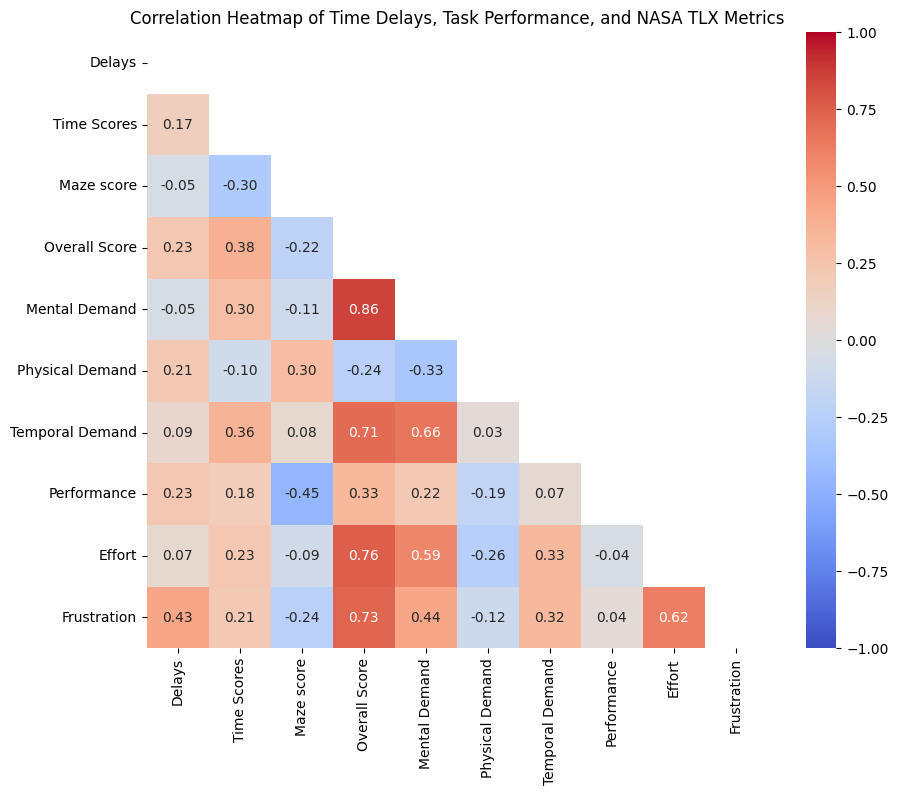

In [58]:
# Generate a correlation heatmap of the relevant variables
plt.figure(figsize=(10, 8))

# Compute the correlation matrix
corr_matrix = data[['Delays', 'Time Scores', 'Maze score', 'Overall Score'] + nasa_tlx_columns].corr()

# Mask the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, mask=mask)
plt.title('Correlation Heatmap of Time Delays, Task Performance, and NASA TLX Metrics')
plt.show()


C:\Users\raul_\AppData\Local\Temp\ipykernel_42424\3826534834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Delays', y='Time Scores', palette='Blues')


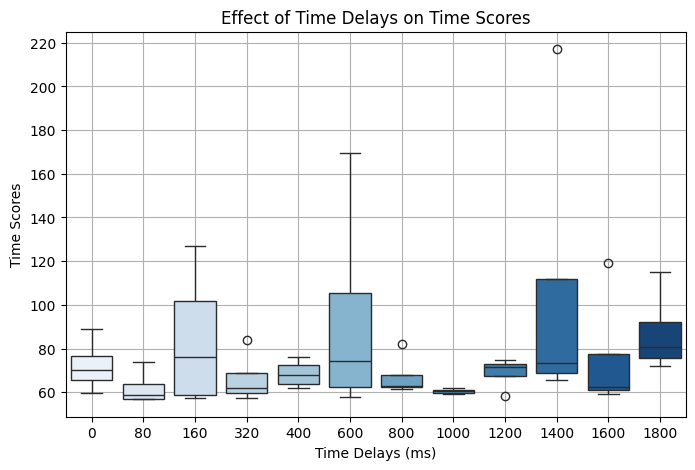

In [60]:

# Boxplot: Time Scores vs Delays
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Delays', y='Time Scores', palette='Blues')
plt.title('Effect of Time Delays on Time Scores')
plt.xlabel('Time Delays (ms)')
plt.ylabel('Time Scores')
plt.grid(True)
plt.show()


C:\Users\raul_\AppData\Local\Temp\ipykernel_42424\3465506335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Delays', y='Maze score', palette='Greens')


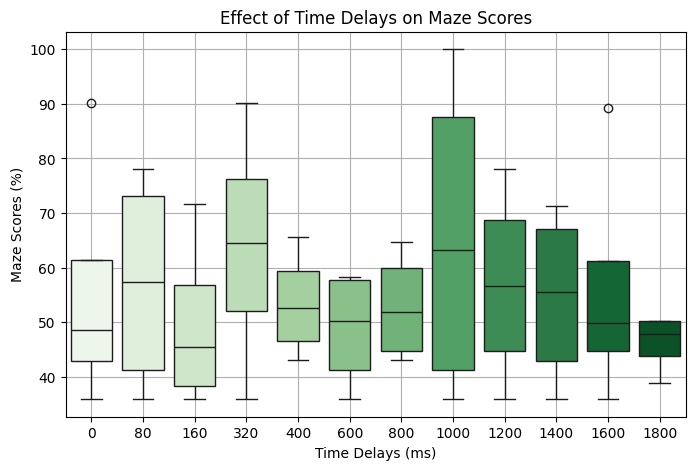

In [26]:

# Boxplot: Maze Scores vs Delays
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Delays', y='Maze score', palette='Greens')
plt.title('Effect of Time Delays on Maze Scores')
plt.xlabel('Time Delays (ms)')
plt.ylabel('Maze Scores (%)')
plt.grid(True)
plt.show()


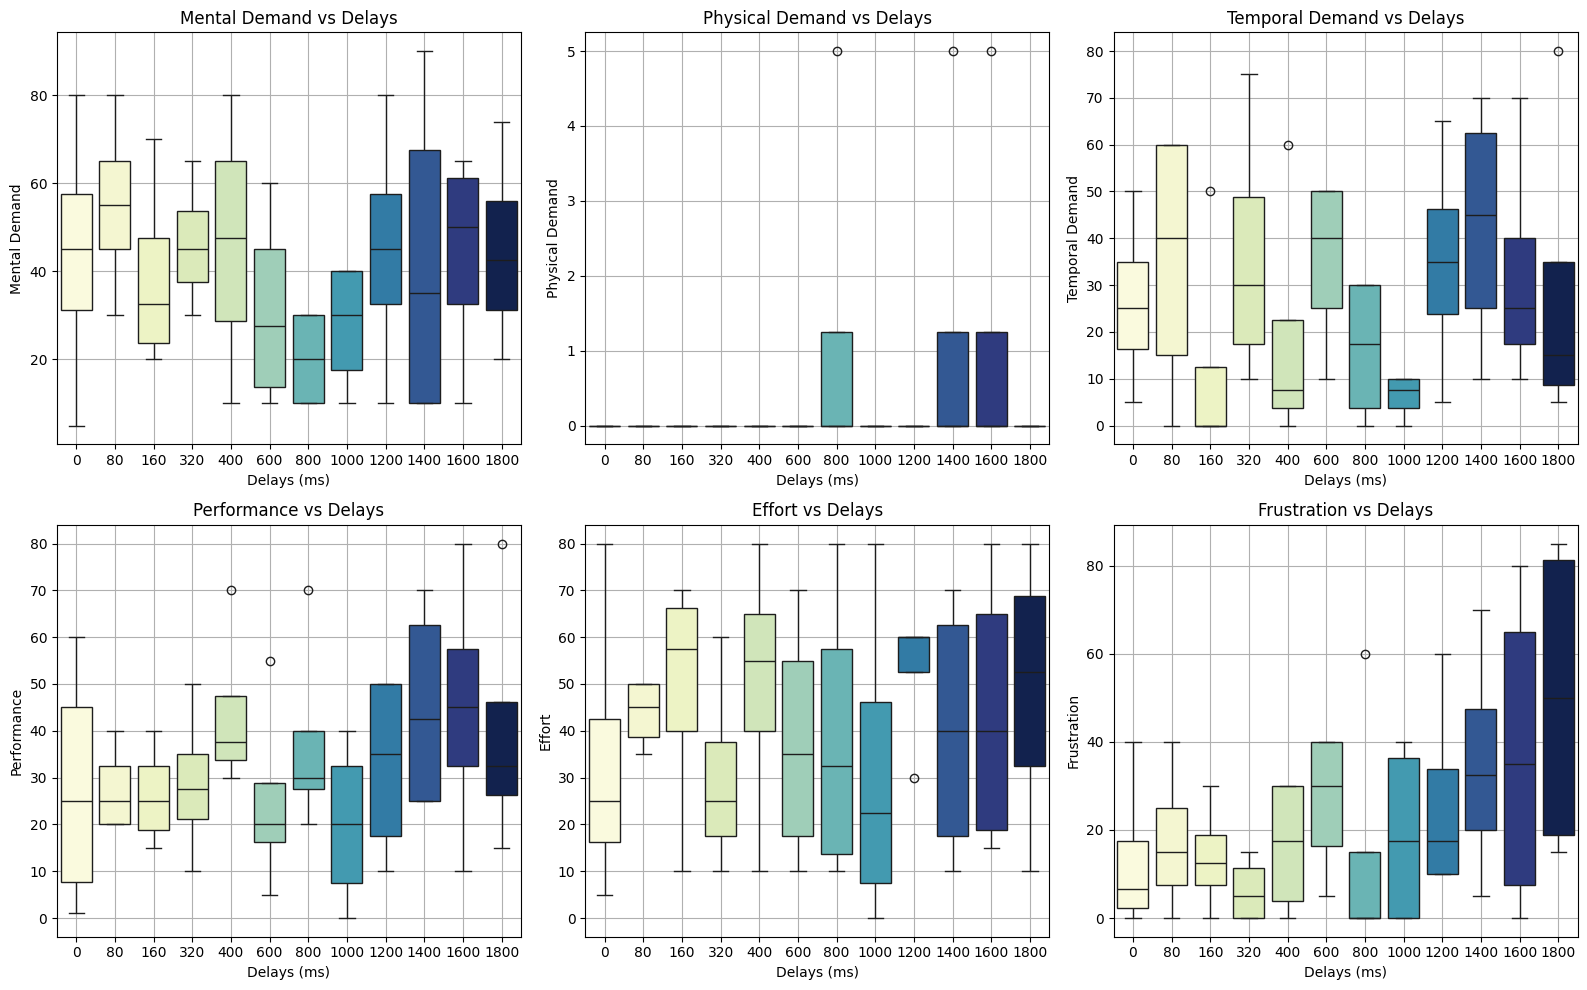

In [51]:

# Boxplots for each NASA-TLX dimension
plt.figure(figsize=(16, 10))

for i, dim in enumerate(nasa_tlx_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x='Delays', y=dim, palette='YlGnBu', hue='Delays', legend=False)
    plt.title(f'{dim} vs Delays')
    plt.xlabel('Delays (ms)')
    plt.ylabel(dim)
    plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\raul_\AppData\Local\Temp\ipykernel_42424\4246041232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Delays', y='Overall Score', palette='Reds')


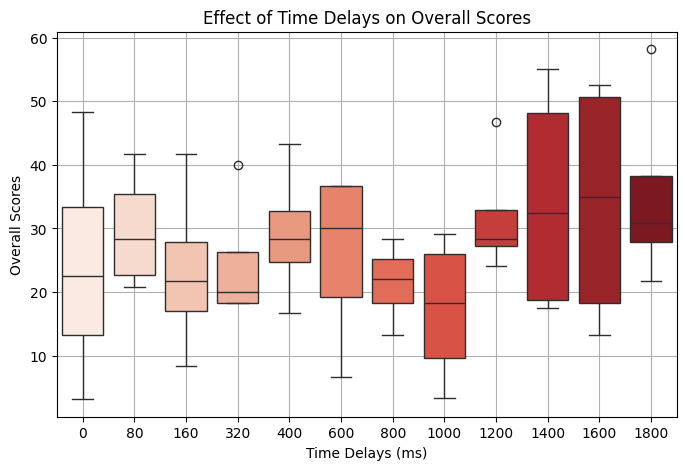

In [61]:
# Box plot of Overall Scores vs Delays
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Delays', y='Overall Score', palette='Reds')
plt.title('Effect of Time Delays on Overall Scores')
plt.xlabel('Time Delays (ms)')
plt.ylabel('Overall Scores')
plt.grid(True)
plt.show()  


### Analysis Summary
1. **Time Scores vs Delays**: As expected, time scores increase as time delays grow, indicating that participants took longer to complete tasks with higher latency.
2. **Maze Scores vs Delays**: Maze scores tend to decrease with increasing delays, suggesting that higher time delays impact participants' situational awareness and ability to reconstruct the maze.
3. **NASA-TLX Metrics**: Mental demand, effort, and frustration increase significantly with higher time delays, while physical demand remains relatively low and unaffected across all delays. Performance decreases as delays increase, reflecting participants' perceived difficulty in managing the tasks.


## Regression OLS results

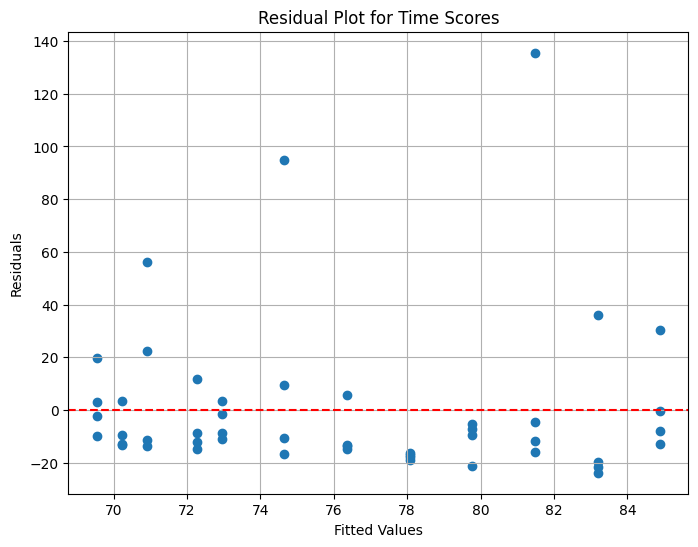

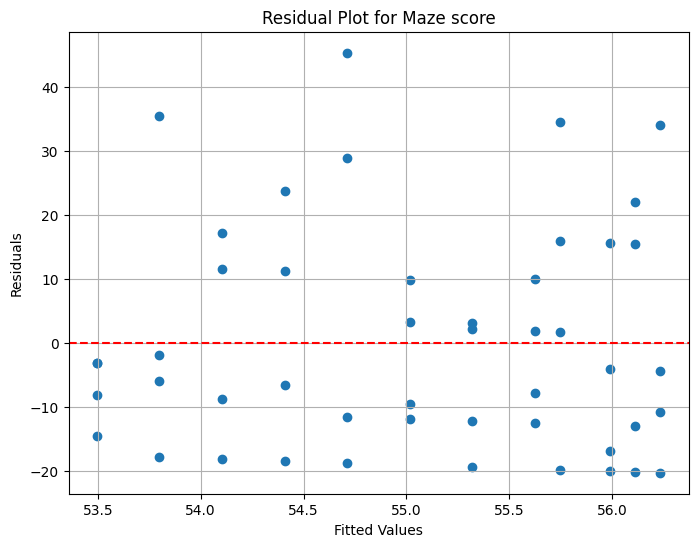

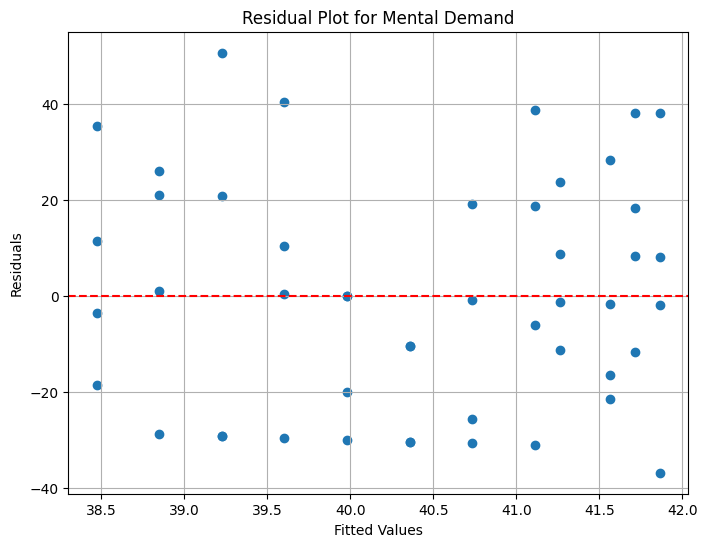

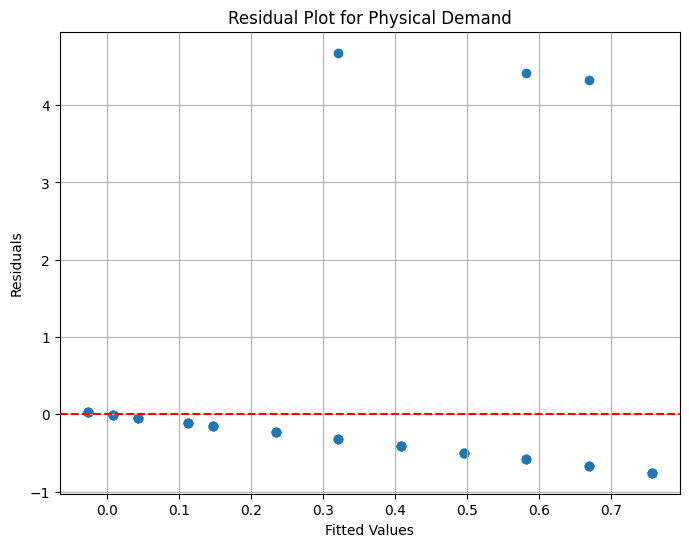

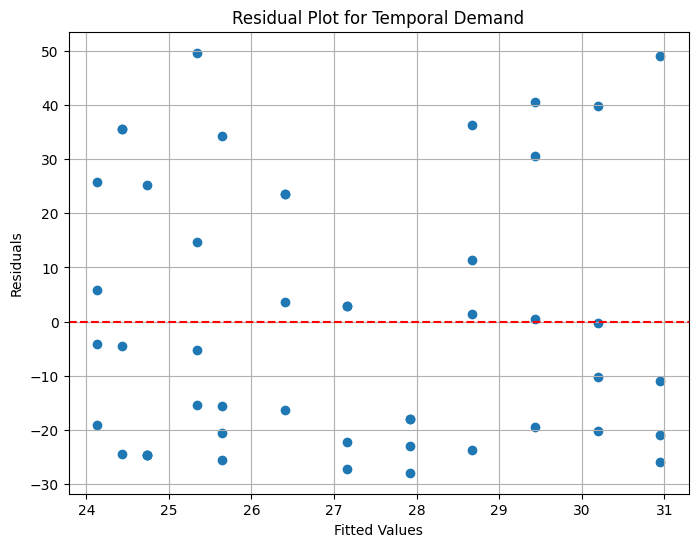

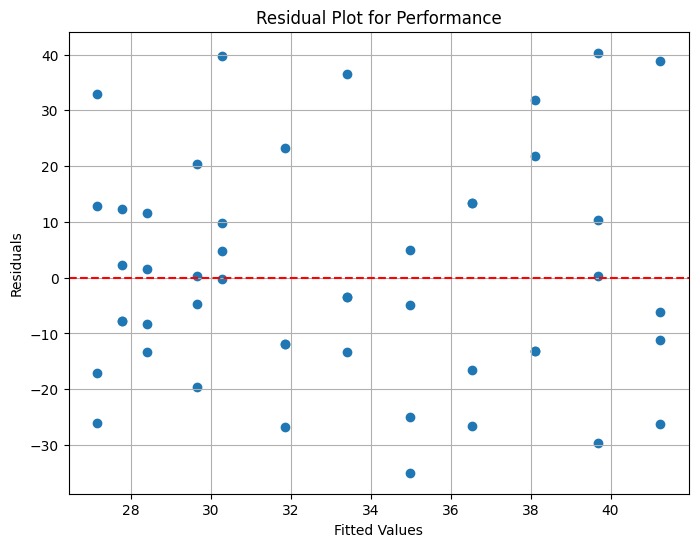

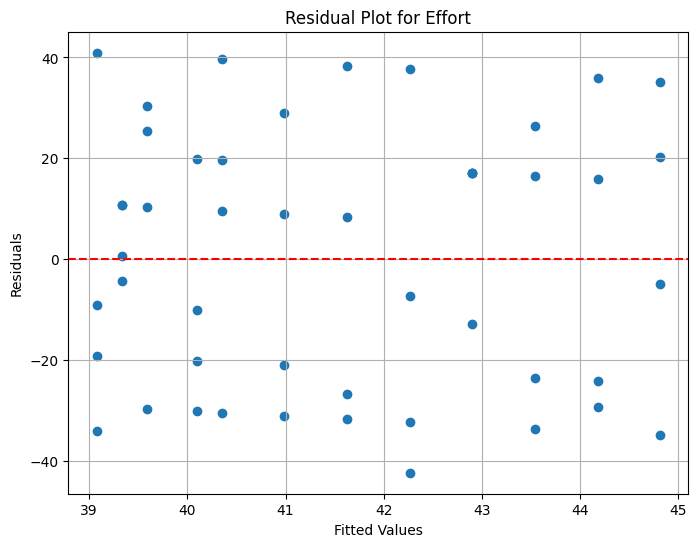

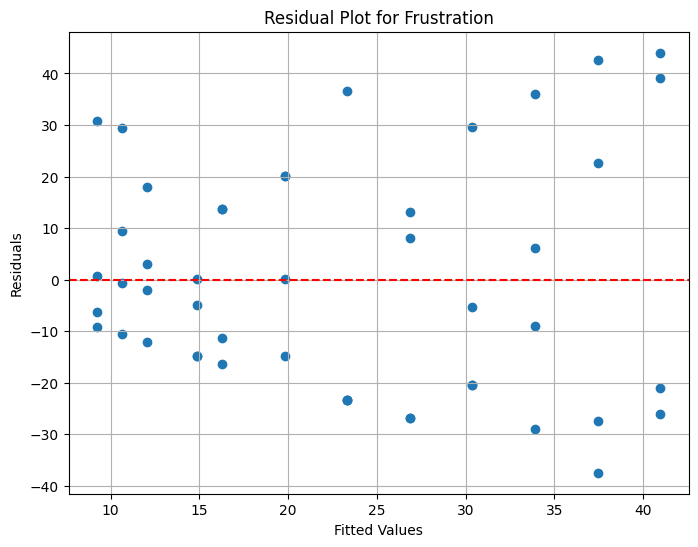

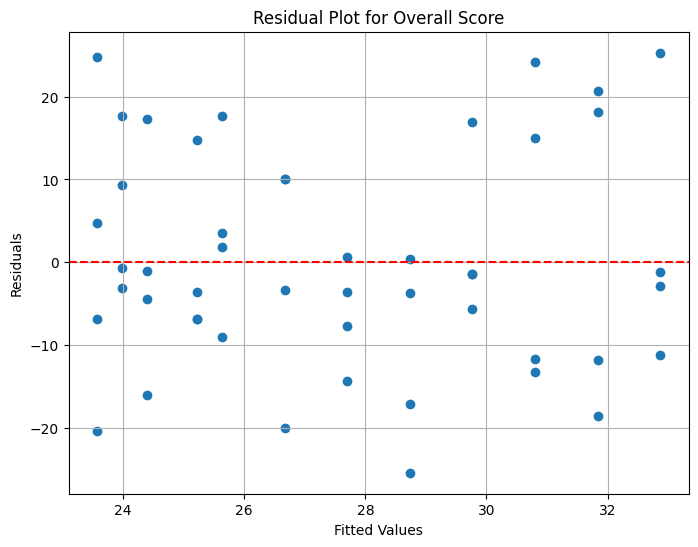

,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time Scores,0.008531,0.007233,1.179478,0.244272,"[-0.006, 0.023]"
1,Maze score,-0.001523,0.004289,-0.355174,0.724083,"[-0.010, 0.007]"
2,Mental Demand,-0.001885,0.005856,-0.321877,0.749004,"[-0.014, 0.010]"
3,Physical Demand,0.000435,0.000295,1.475373,0.146925,"[-0.000, 0.001]"
4,Temporal Demand,0.003791,0.005964,0.635678,0.528136,"[-0.008, 0.016]"
5,Performance,0.007841,0.004900,1.600056,0.116433,"[-0.002, 0.018]"
6,Effort,0.003189,0.006265,0.509073,0.613135,"[-0.009, 0.016]"
7,Frustration,0.017650,0.005410,3.262117,0.002088,"[0.007, 0.029]"
8,Overall Score,0.005170,0.003244,1.593531,0.117890,"[-0.001, 0.012]"


In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Clean up the Maze Score column (convert from percentage strings to floats)

# Define the independent and dependent variables
independent_var = 'Delays'
dependent_vars = ['Time Scores', 'Maze score', 'Mental Demand', 'Physical Demand', 'Temporal Demand', 
                  'Performance', 'Effort', 'Frustration', 'Overall Score']

# Prepare a list to collect OLS regression results
regression_results = []

# Perform OLS regression for each dependent variable
for dependent_var in dependent_vars:
    if dependent_var in data.columns and pd.api.types.is_numeric_dtype(data[dependent_var]):
        X = sm.add_constant(data[independent_var])  # Add a constant to the independent variable
        y = data[dependent_var]  # Dependent variable

        # Fit the OLS model
        model = sm.OLS(y, X).fit()

        # Get the confidence intervals for the independent variable
        conf_int = model.conf_int().loc[independent_var]

        # Append the results to the list
        regression_results.append({
            "Dependent Variable": dependent_var,
            "Coefficient": model.params[independent_var],
            "Standard Error": model.bse[independent_var],
            "t-Value": model.tvalues[independent_var],
            "P>|t|": model.pvalues[independent_var],
            "95% Confidence Interval": f"[{conf_int[0]:.3f}, {conf_int[1]:.3f}]"
        })

# Convert the results to a DataFrame for better presentation
regression_summary_df = pd.DataFrame(regression_results)

# Display the consolidated OLS regression results
regression_summary_df



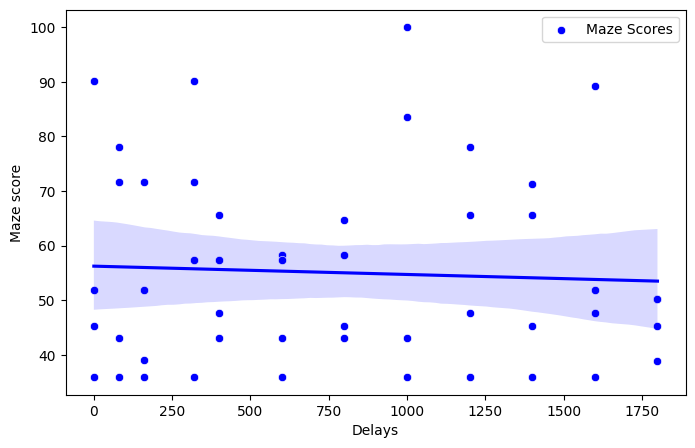

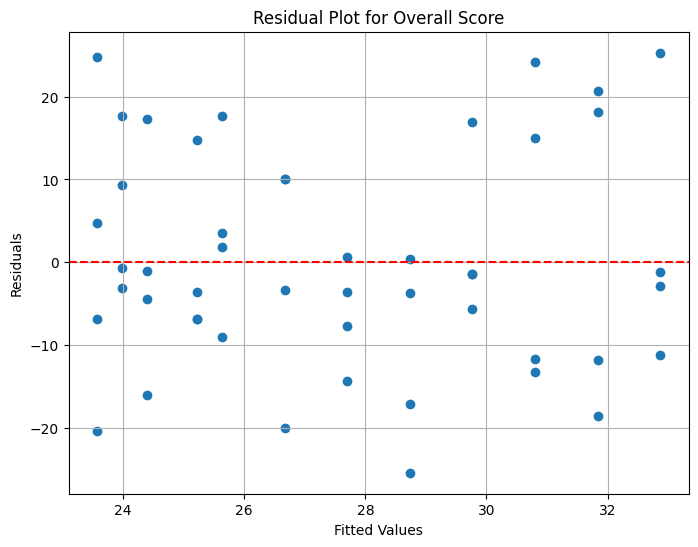

In [77]:
# Plot the regression line for Maze Scores vs Delays
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Delays', y='Maze score', color='blue', label='Maze Scores')
sns.regplot(data=data, x='Delays', y='Maze score', scatter=False, color='blue')

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.title(f'Residual Plot for {dependent_var}')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
